# KNN Classifier

classify the IRIS flower dataset using KNN classifier. IRIS dataset has 3 classes of IRIS flowers, namely, 'setosa', 'versicolor', and 'virginica.

# Data exploration and preparation
1. Familiarize yourself with the data set.
    [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)
    - How many samples does the data set have?
    - How many features does the data set have?
    - What's the mean and standard deviation of the features?
    - User Seaborn to make a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) of the features and visually analyze the distribution of the data.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data set as a pandas dataframe
df = sns.load_dataset('iris')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# describe gives a summary of the data with the mean, standard deviation, min, max, and quartiles
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pairplot of the Iris data set')

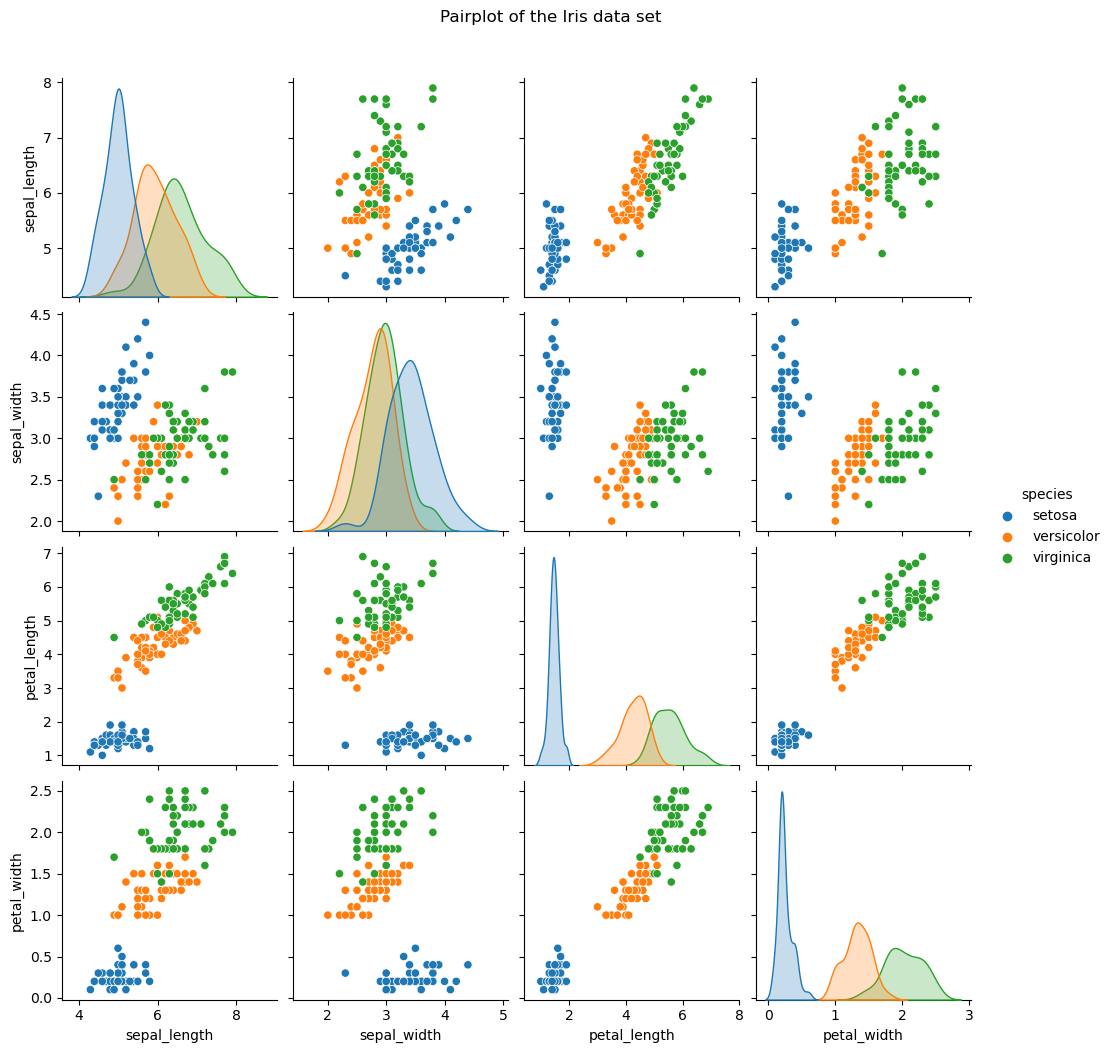

In [5]:
# pairplot gives a scatter plot of each variable against each other variable
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of the Iris data set', y=1.05)

###

2. For the classification we will use features 'sepal length (cm)' and 'petal width (cm)'.   
    - Make a scatterplot of these two features.
    - Are these two features good for classification? Do they separate the data well?


Text(0.5, 0.98, 'Scatter plot of petal length vs petal width')

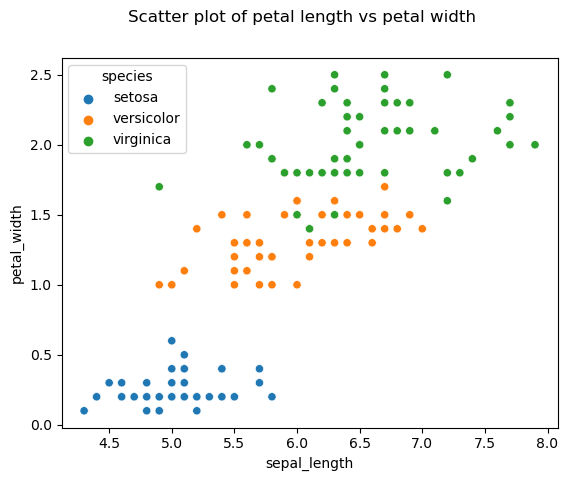

In [6]:
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=df)
plt.suptitle('Scatter plot of petal length vs petal width')

###

>We see that *petal_with* and *sepal_length* are good for classifying the species as they separate the data quite well.   

In [7]:
# Helper function to plot the decision boundary 
def plot_decision_boundary(X, y_true, pipe, feature_names=['x1', 'x2'], title='Decision Boundary'):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # Predict the function value for the whole gid
    Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.9)
    plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.Spectral, edgecolors='k')
    # plot the predicted class for each data point
    plt.scatter(X[:, 0], X[:, 1], c=pipe.predict(X), cmap=plt.cm.Spectral, s=1)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Fit the model for different values of k
1. Create an 80/20 train/test split. X_train, y_train, X_test, y_test
1. Create a function that returns a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the scaler and the [KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with the defined number of neighbours and metric. build_knn_pipeline(n_neighbours, metric)

    TIP: Since KNN is a distance-based algorithm, it is sensitive to the scale of the data.   
    Do not forget to scale the data before we use it.
    Use the standard scaler [*(StandardScaler)*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise the data.
1. For [1, 2, 3, 5, 15, 20, 30, 40, 50, 100, 105, 110, 115] and distance metric = 'euclidean', fit the KNN pipeline to the training data, use the pipeline to make predictions on both the training and test data.

You may use the provided function `plot_descision_bounday(X, y, pipe, feature_names, title)` to plot the descision boundary.

What effect does k have on the models prediction?

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Create a numpy array of the features and a numpy array of the target
# And map the species column (string) to a number

feature_names = ['sepal_length', 'petal_width']

X = df[feature_names].to_numpy()
y = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).to_numpy()

X.shape, y.shape

((150, 2), (150,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

###

(120, 2) (120,)
(30, 2) (30,)


In [10]:
# We descide to use the standard scaler as the data can be assumed to be normally distributed

def build_knn_pipeline(n_neighbors, metric="euclidean"):
    scaler = StandardScaler()
    KNNclf = KNeighborsClassifier(n_neighbors, metric=metric)
    pipe = Pipeline([('scaler', scaler),
                    ('KNNclf', KNNclf)])
    return pipe

###

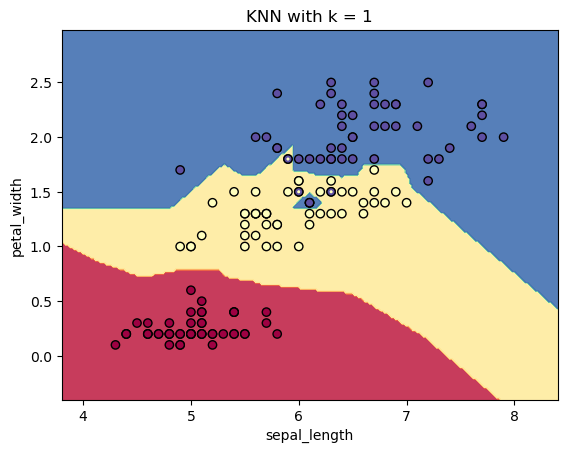

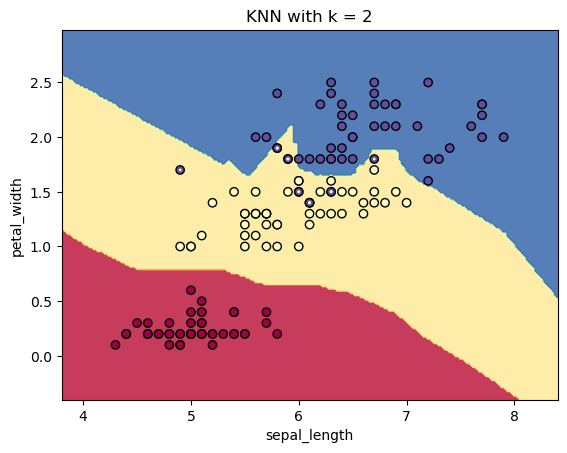

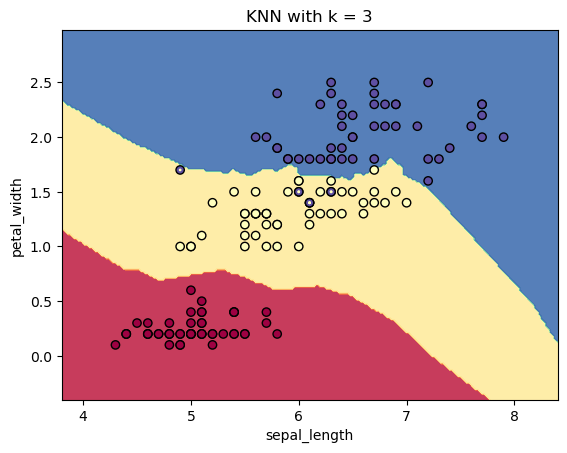

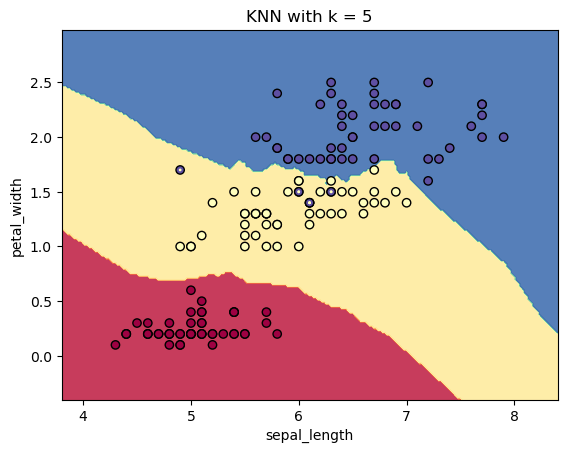

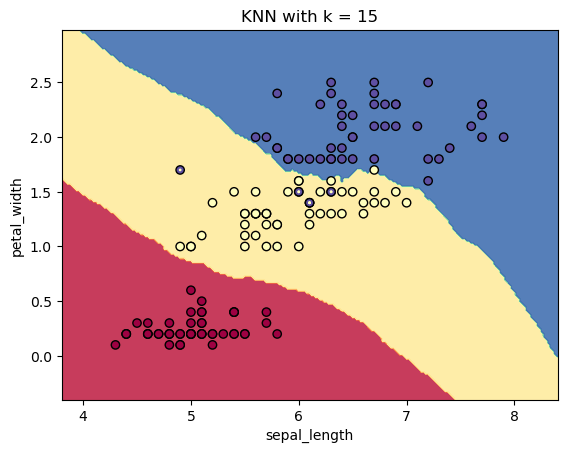

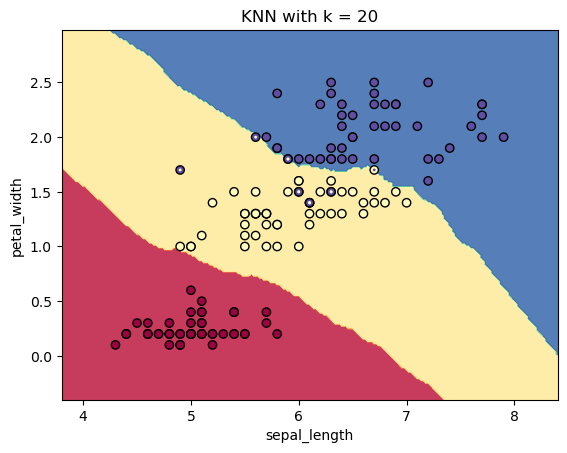

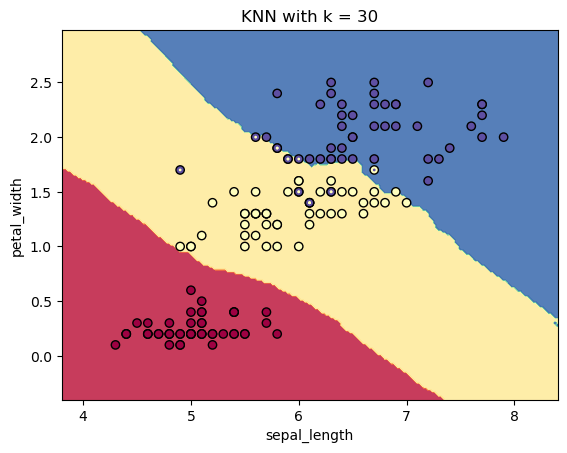

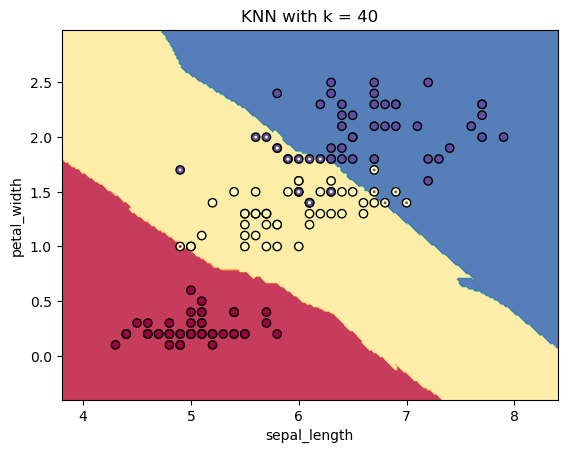

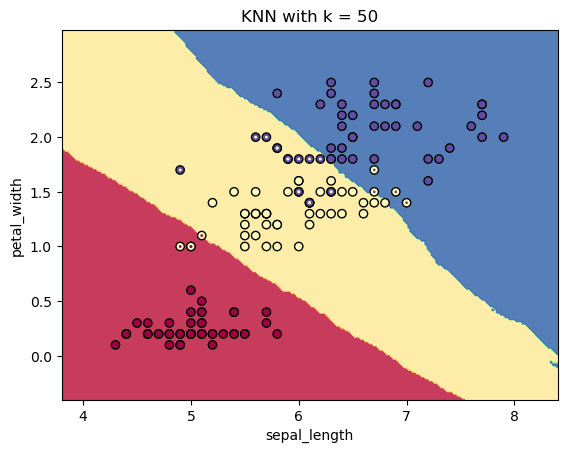

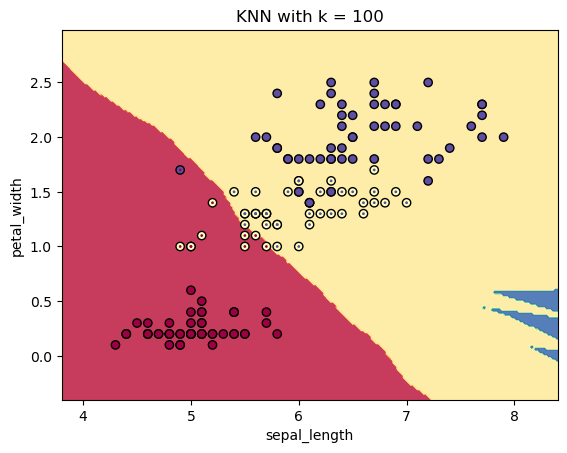

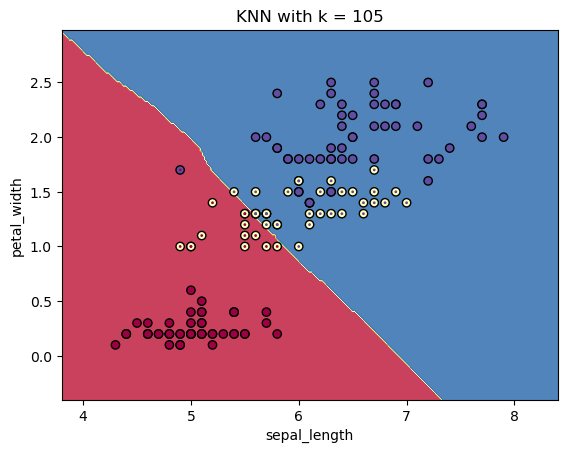

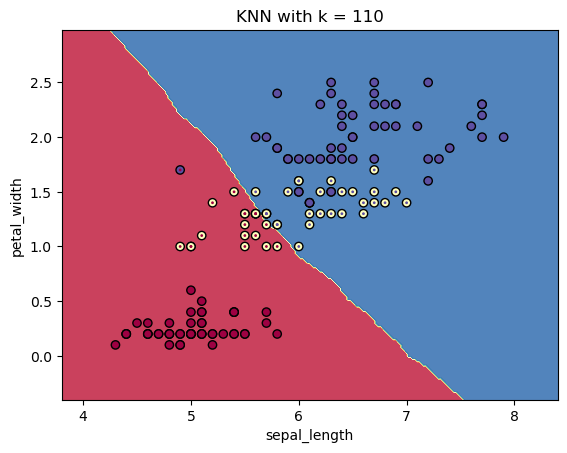

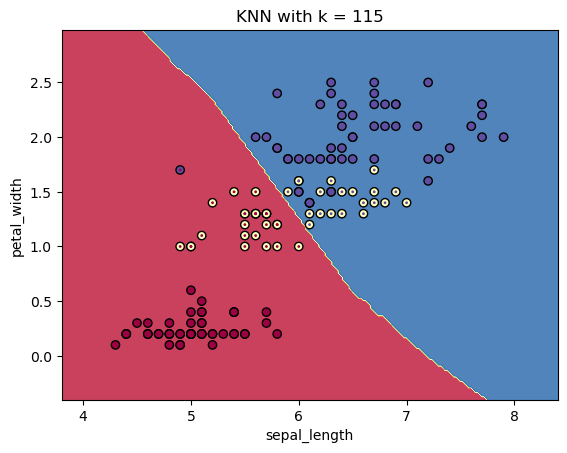

In [11]:

k_list = [1, 2, 3, 5, 15, 20, 30, 40, 50, 100, 105, 110, 115]

y_hats_train = []
y_hats_test = []

for k in k_list:
    # Build the pipeline with the k value and fit it to the training data
    pipe = build_knn_pipeline(k)
    pipe.fit(X_train, y_train)

    # Predict on the training and test data
    y_hat_train = pipe.predict(X_train)
    y_hats_train.append(y_hat_train)
    y_hat_test = pipe.predict(X_test)
    y_hats_test.append(y_hat_test)

    # Plot the decision boundary
    plot_decision_boundary(X, y, pipe, feature_names, f'KNN with k = {k}')
    
###



>- if k is too small (e.g. 1 in the first plot), the decision boundary is dominated by only 1 datapoint. There is a risk of **overfitting** or fitting to the noise.
>- As k startes to increase, the decision boundary starts to be smoother as more and more neighbours vote on the classification. There is less and less variance.
>- If k is too large (e.g. 50 in the last figure), the decision boundaries are very smooth and cannot capture small differences that occur at the boundaries. Edge cases are more likely to be misclassified. There is a risk of **underfitting**.


# Confusion Matrix
Resource for [Confusion Matrix, Precision, Recall](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826)

1. Calculate the overall accuracy for each value of k.

2. Using the predicted classes on the test data of the KNN classifier, print the confusion matrix for each of the tested values of k.   
You can use the function [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from sklearn.metrics to generate the confusion matrix for each classifier.   

1. For each of the values of k, print the precision and recall for each of the 3 classes.   
You can use [`metrics.classification_report(y_test, pred, output_dict=True)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to get the precision and recall per class.   

1. What value of k would you choose? Explain.

Help:
$accuracy = \frac{tp + tn}{tp + tn + fp + fn}$   

$precision = \frac{tp}{(tp + fp)}$   

$recall = \frac{tp}{(tp + fn)}$

k=1  Accuracy: 0.8666666666666667
[[9 0 0]
 [0 9 1]
 [0 3 8]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.75, Recall = 0.90
Class 2: Precision = 0.89, Recall = 0.73
k=2  Accuracy: 0.8666666666666667
[[ 9  0  0]
 [ 0 10  0]
 [ 0  4  7]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.71, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.64
k=3  Accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.83, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=5  Accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.83, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=15  Accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.83, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=20  Accuracy: 0.9
[[ 9  0  0]
 [ 0 1

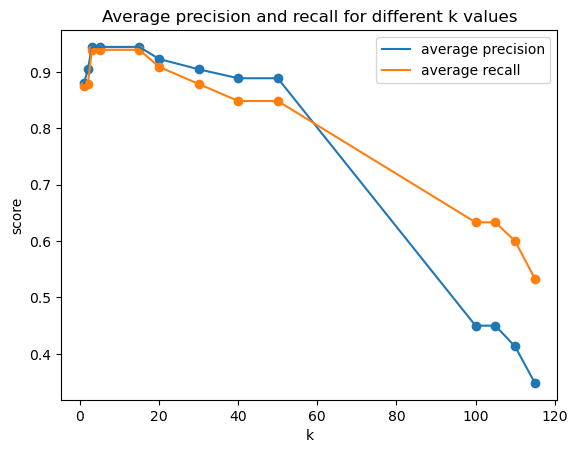

In [12]:
import sklearn.metrics as metrics

test_accuracy = []
mean_precisions = []
mean_recalls = []


for k, pred in zip(k_list, y_hats_test):

    # 3.1 calculate the accuracy 
    accuracy = np.mean(pred == y_test) 
    test_accuracy.append(accuracy)
    print(f'k={k}  Accuracy: {accuracy}')

    # 3.2 print the confusion matrix
    cm = metrics.confusion_matrix(y_test, pred)
    print(cm) 

    # 3.3 print the precision and recall for each class
    report = metrics.classification_report(y_test, pred, output_dict=True, zero_division=0)

    precisions = [report[f'{x}']['precision'] for x in range(3)]
    recalls = [report[f'{x}']['recall'] for x in range(3)]

    print(f'Class 0: Precision = {precisions[0]:.2f}, Recall = {recalls[0]:.2f}')
    print(f'Class 1: Precision = {precisions[1]:.2f}, Recall = {recalls[1]:.2f}')
    print(f'Class 2: Precision = {precisions[2]:.2f}, Recall = {recalls[2]:.2f}')

    mean_precisions.append(np.mean(precisions))
    mean_recalls.append(np.mean(recalls))

# plot  precision and recall for each k value
plt.plot(k_list, mean_precisions, label='average precision')
plt.scatter(k_list, mean_precisions)
plt.plot(k_list, mean_recalls, label='average recall')
plt.scatter(k_list, mean_recalls)
plt.xlabel('k')
plt.ylabel('score')
plt.title('Average precision and recall for different k values')
plt.legend()

###


> From this plot, we can see that for this case, we can choose k as 3, 5 or 15, as these gave the best classification performance on the test data.

# Cross Validation for choosing the value of k

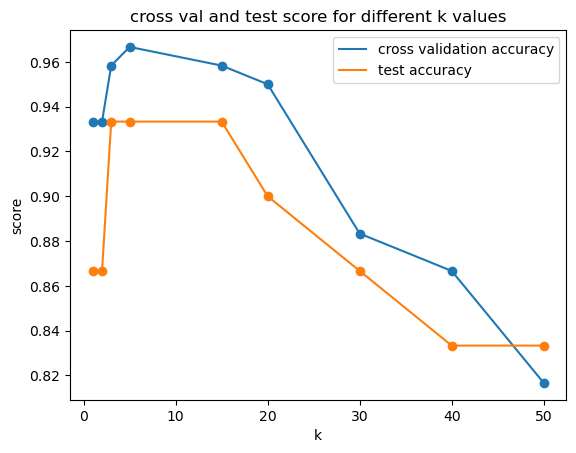

In [13]:
from sklearn.model_selection import cross_val_score

k_list = [1, 2, 3, 5, 15, 20, 30, 40, 50]

crossval_score = []
test_score = []

for k in k_list:
    # Build the pipeline with the k value and fit it to the training data
    pipe = build_knn_pipeline(k)
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    crossval_score.append(scores.mean())
    accuracy = pipe.score(X_test, y_test)
    test_score.append(accuracy)

plt.plot(k_list, crossval_score, label='cross validation accuracy')
plt.scatter(k_list, crossval_score)
plt.plot(k_list, test_score, label='test accuracy')
plt.scatter(k_list, test_score)
plt.xlabel('k')
plt.ylabel('score')
plt.title('cross val and test score for different k values')
plt.legend()

The cross validation score increases slightly at k=5 and falls afterwards. The test accuracy remains stable.
K=5 is the final choice!

# All Features

In [14]:
feature_names = ['sepal_length', 'petal_width', 'sepal_width', 'petal_length']

X = df[feature_names].to_numpy()
y = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).to_numpy()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [16]:
k_list = [1, 2, 3, 5, 6, 7, 8,9,10, 15, 20, 50]

y_hats_train = []
y_hats_test = []

for k in k_list:
    # Build the pipeline with the k value and fit it to the training data
    pipe = build_knn_pipeline(k)
    pipe.fit(X_train, y_train)

    # Predict on the training and test data
    y_hat_train = pipe.predict(X_train)
    y_hats_train.append(y_hat_train)
    y_hat_test = pipe.predict(X_test)
    y_hats_test.append(y_hat_test)


k=1  Accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.83, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=2  Accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.83, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=3  Accuracy: 0.9
[[ 8  1  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 0.89
Class 1: Precision = 0.77, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=5  Accuracy: 0.9
[[ 8  1  0]
 [ 0 10  0]
 [ 0  2  9]]
Class 0: Precision = 1.00, Recall = 0.89
Class 1: Precision = 0.77, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.82
k=6  Accuracy: 0.9
[[ 9  0  0]
 [ 0 10  0]
 [ 0  3  8]]
Class 0: Precision = 1.00, Recall = 1.00
Class 1: Precision = 0.77, Recall = 1.00
Class 2: Precision = 1.00, Recall = 0.73
k=7  Accuracy: 0.8666666666666667
[[9 0 0]
 [0 9 1]
 [0 3 8]]
Class 0: Prec

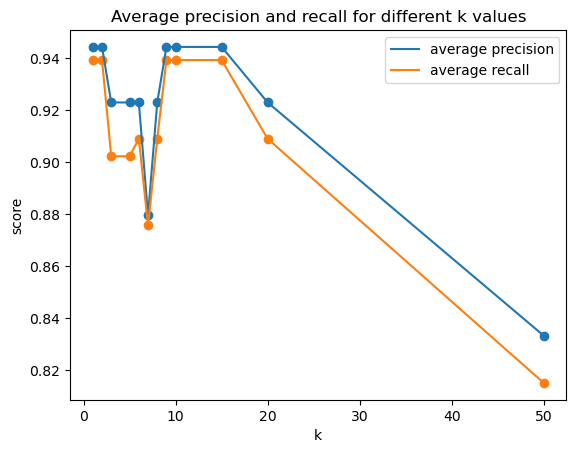

In [17]:
test_accuracy = []
mean_precisions = []
mean_recalls = []


for k, pred in zip(k_list, y_hats_test):

    # 3.1 calculate the accuracy 
    accuracy = np.mean(pred == y_test) 
    test_accuracy.append(accuracy)
    print(f'k={k}  Accuracy: {accuracy}')

    # 3.2 print the confusion matrix
    cm = metrics.confusion_matrix(y_test, pred)
    print(cm) 

    # 3.3 print the precision and recall for each class
    report = metrics.classification_report(y_test, pred, output_dict=True, zero_division=0)

    precisions = [report[f'{x}']['precision'] for x in range(3)]
    recalls = [report[f'{x}']['recall'] for x in range(3)]

    print(f'Class 0: Precision = {precisions[0]:.2f}, Recall = {recalls[0]:.2f}')
    print(f'Class 1: Precision = {precisions[1]:.2f}, Recall = {recalls[1]:.2f}')
    print(f'Class 2: Precision = {precisions[2]:.2f}, Recall = {recalls[2]:.2f}')

    mean_precisions.append(np.mean(precisions))
    mean_recalls.append(np.mean(recalls))

# plot  precision and recall for each k value
plt.plot(k_list, mean_precisions, label='average precision')
plt.scatter(k_list, mean_precisions)
plt.plot(k_list, mean_recalls, label='average recall')
plt.scatter(k_list, mean_recalls)
plt.xlabel('k')
plt.ylabel('score')
plt.title('Average precision and recall for different k values')
plt.legend()

###


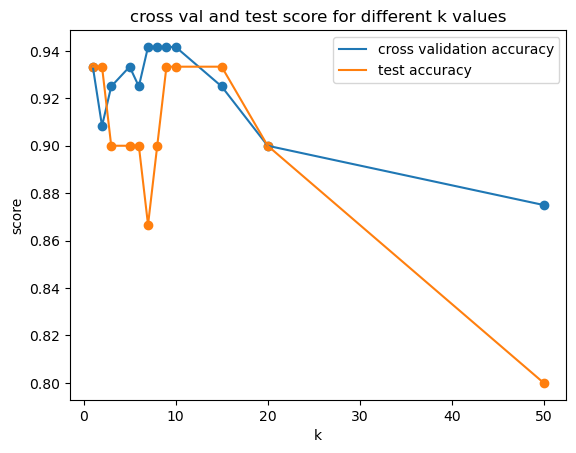

In [18]:
from sklearn.model_selection import cross_val_score

k_list = [1, 2, 3, 5, 6, 7, 8, 9, 10, 15, 20, 50]

crossval_score = []
test_score = []

for k in k_list:
    # Build the pipeline with the k value and fit it to the training data
    pipe = build_knn_pipeline(k)
    pipe.fit(X_train, y_train)
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    crossval_score.append(scores.mean())
    accuracy = pipe.score(X_test, y_test)
    test_score.append(accuracy)

plt.plot(k_list, crossval_score, label='cross validation accuracy')
plt.scatter(k_list, crossval_score)
plt.plot(k_list, test_score, label='test accuracy')
plt.scatter(k_list, test_score)
plt.xlabel('k')
plt.ylabel('score')
plt.title('cross val and test score for different k values')
plt.legend()

If we include all features, the choice of k changes to 9 or 10.